# Portfolio Risk Assessment and Investment Strategy Optimization with yFinance Data Collection

## Data Gathering

In [109]:
!pip install pandas numpy matplotlib yfinance

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [111]:
portfolio_symbols = ['AAPL', 'MSFT', 'GOOGL',
                     'AMZN', 'META', 'NVDA',
                     'INTC', 'CSCO', 'CRM',
                     'QCOM']

In [112]:
start_date = '2021-01-01'
end_date = '2023-12-31'
portfolio_data = yf.download(portfolio_symbols, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [113]:
daily_returns = portfolio_data.pct_change()

In [114]:
daily_returns

Ticker,AAPL,AMZN,CRM,CSCO,GOOGL,INTC,META,MSFT,NVDA,QCOM
Date,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.012364,0.010004,0.005492,0.000455,0.008064,0.018925,0.007548,0.000965,0.022210,0.026465
2021-01-06,-0.033661,-0.024897,-0.024242,0.009550,-0.009868,0.009682,-0.028269,-0.025929,-0.058953,-0.008135
2021-01-07,0.034123,0.007577,0.008466,0.012612,0.029869,0.021331,0.020622,0.028457,0.057830,0.029830
2021-01-08,0.008631,0.006496,0.018626,0.002224,0.013239,-0.010347,-0.004354,0.006093,-0.005040,0.006037
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.005547,-0.002730,-0.003405,0.007847,0.007620,0.019541,-0.001977,0.002784,-0.003266,0.007372
2023-12-26,-0.002841,-0.000065,-0.000451,0.003793,0.000212,0.052083,0.004075,0.000214,0.009195,0.013729
2023-12-27,0.000518,-0.000456,0.001878,0.003182,-0.008126,0.005148,0.008455,-0.001575,0.002800,0.001787


### Portfolio allocation

Portfolio weights represent the assets' value in the portfolio that we have.

In [115]:
portfolio_weights = [0.1, 0.2, 0.15, 0.1, 0.15, 0.1, 0.05, 0.05, 0.05, 0.05]

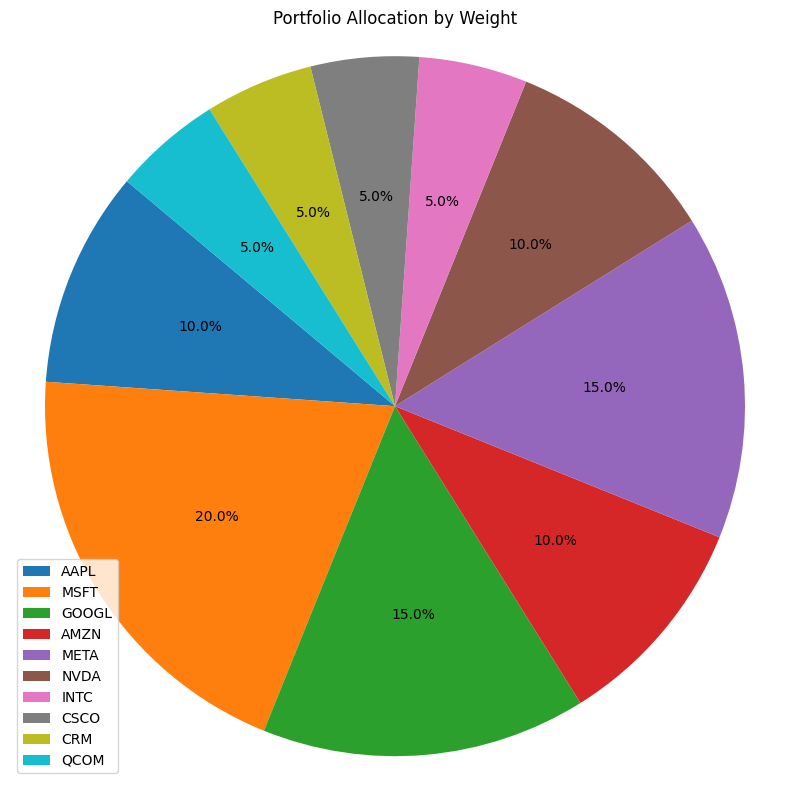

In [116]:
#portfolio_weights = [0.1, 0.2, 0.15, 0.1, 0.15, 0.1, 0.05, 0.05, 0.05, 0.05]  # Example weights
companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'NVDA', 'INTC', 'CSCO', 'CRM', 'QCOM']

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(portfolio_weights, autopct='%1.1f%%', startangle=140)
plt.title('Portfolio Allocation by Weight')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=portfolio_symbols)
plt.tight_layout()
plt.show()

### Cumulative Returns for the portfolio

In [117]:
portfolio_returns = daily_returns.dot(portfolio_weights)

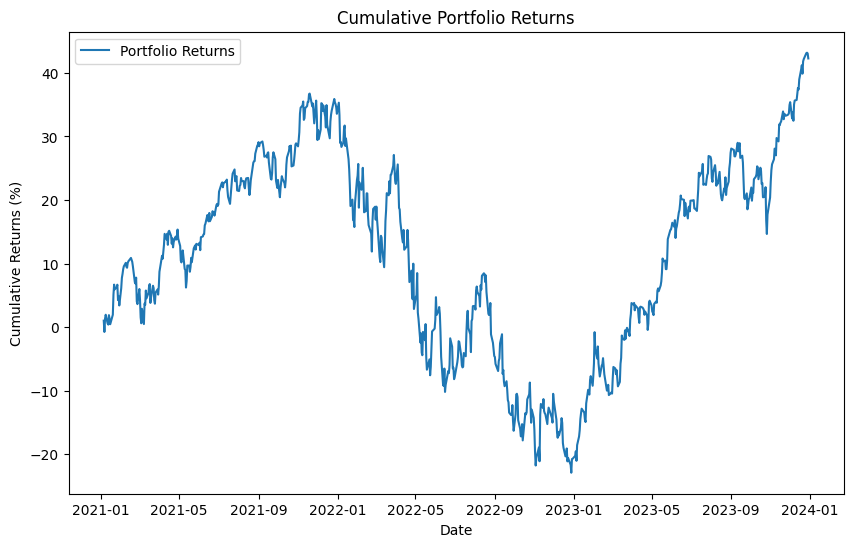

In [118]:
cumulative_returns = ((portfolio_returns + 1).cumprod() - 1)*100
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label='Portfolio Returns')
plt.title('Cumulative Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.legend()
plt.show()

We can see that the end-dat cumulative returns are near 40%.

### Daily Returns for each company

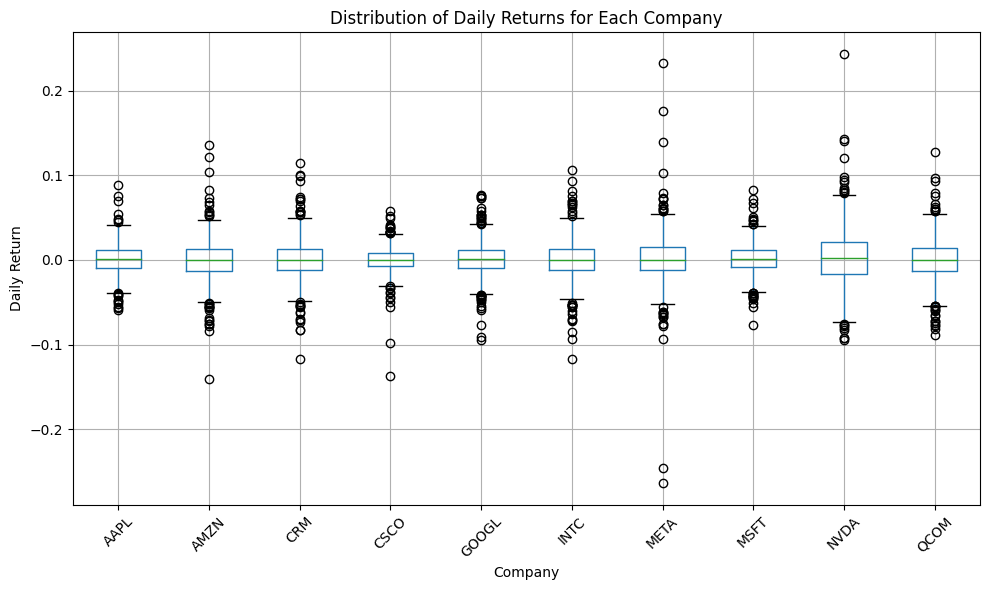

In [119]:
# Creating the box plots
plt.figure(figsize=(10, 6))
daily_returns.boxplot()
plt.title('Distribution of Daily Returns for Each Company')
plt.ylabel('Daily Return')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [120]:
# Generating the date range between January 2021, and December 2023
date_range = pd.date_range(start=start_date, end=end_date)

# Filtering out the weekends (Monday=0, Sunday=6)
trading_days = date_range[date_range.dayofweek < 5]

# Counting the number of trading days within that date range
num_trading_days = len(trading_days)

print("Number of trading days between", start_date, "and", end_date, ":", num_trading_days)

Number of trading days between 2021-01-01 and 2023-12-31 : 781


### Risk Assessment

In [121]:
portfolio_volatility = (np.std(portfolio_returns) * np.sqrt(781)) # This is the annualized volatility (assuming 781 trading days)
portfolio_volatility_percentage = portfolio_volatility*100
print(f"Portfolio Volatility: {portfolio_volatility_percentage:.2f}%")

Portfolio Volatility: 47.40%


In [122]:
# Comparing to the benchmark
benchmark_volatility = 0.35
if portfolio_volatility > benchmark_volatility:
    print("Portfolio volatility is higher than the benchmark.")
else:
    print("Portfolio volatility is lower than the benchmark.")


Portfolio volatility is higher than the benchmark.


In [123]:
# Considering the Risk Tolerance
risk_tolerance = 0.2  # Assumed risk tolerance(usually given in the problem statement)
if portfolio_volatility > risk_tolerance:
    print("Portfolio volatility exceeds risk tolerance. Reassess risk exposure.")
else:
    print("Portfolio volatility is within acceptable risk tolerance.")


Portfolio volatility exceeds risk tolerance. Reassess risk exposure.


### Investment Decision-making

In [124]:
# Asset Allocation
if portfolio_volatility > benchmark_volatility:
    print("Adjusting asset allocation to reduce risk.")
else:
    print("Maintaining or adjusting asset allocation based on investment objectives.")

Adjusting asset allocation to reduce risk.


In [125]:
# Portfolio Rebalancing (assuming target allocation percentages)
target_allocation = np.array([0.6, 0.4])  # target allocation: 60% stocks, 40% bonds
current_allocation = np.array([0.7, 0.3])  #current allocation: 70% stocks, 30% bonds
if np.any(np.abs(current_allocation - target_allocation) > 0.05):
    print("Rebalance portfolio to maintain target allocation.")
else:
    print("Portfolio allocation is consistent with target allocation.")


Rebalance portfolio to maintain target allocation.


In [126]:
# Risk Management Strategies
if portfolio_volatility > risk_tolerance:
    # Implement risk management strategies to protect the portfolio
    # Example: Set stop-loss orders, use options for hedging, or employ dynamic asset allocation strategies
    print("Implement risk management strategies to protect the portfolio.")
else:
    print("No immediate risk management actions required.")

Implement risk management strategies to protect the portfolio.


## Gained Insights from the collected data

### Portfolio Volatility Assessment
The portfolio volatility is calculated to be 47.40%, which indicates a high level of volatility in the portfolio's returns and is an indicator of how volatile the technology sector is.

### Risk Assessment Findings:
* The portfolio volatility exceeds the benchmark, suggesting that the portfolio carries a higher level of risk compared to the broader market or similar investment strategies.
* The calculated portfolio volatility also exceeds the investor's risk tolerance threshold, indicating that the current level of risk may not align with the investor's risk preferences and objectives.

## Investment Decision-Making Insights
* In response to the risk assessment findings, adjustments are recommended in asset allocation to reduce risk exposure. This may involve reallocating investments to lower-volatility assets or diversifying across asset classes to mitigate overall portfolio volatility.
* Portfolio rebalancing is advised to maintain the target allocation percentages and ensure alignment with the investor's long-term investment objectives.
* Implementation of risk management strategies is recommended to protect the portfolio against adverse market movements and mitigate potential downside risks.

### Recommendations for Future Action


*   It is recommended to reassess the portfolio's risk exposure and realign the investment strategy with the investor's risk tolerance and objectives.
*   Consideration should be given to optimizing asset allocation, rebalancing the portfolio, and implementing risk management techniques to achieve a more balanced risk-return profile.



##Conclusion


*   In conclusion, the analysis highlights the importance of managing portfolio volatility and aligning the investment strategy with the investor's risk preferences and objectives.
*   By taking proactive steps to reduce risk exposure and implement risk management strategies, investors can enhance portfolio resilience and pursue their long-term financial goals with greater confidence.
*   Moving forward, continuous monitoring and review of the portfolio's risk profile and investment strategy are essential to adapt to changing market conditions and investor preferences.
*   By staying informed and proactive, investors can navigate market uncertainties and optimize their investment portfolios to achieve sustainable returns while managing risk effectively.



